In [13]:
#from mpl_plot import *
%matplotlib inline
from IPython.display import display
import numpy as np
import os
import itertools
import scipy.stats
import pandas as pd
import numpy as np
#from openpyxl.writer.excel import ExcelWriter
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
from pylab import *
NUM_COLORS = 5
cm = get_cmap('Set3')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))  

In [4]:
efile = pd.ExcelFile('/Users/yuyu/Desktop/turingaward.xlsx')
sheet = efile.parse('Sheet1')
labels = sheet.columns.values.tolist()
years = [b[0] for b in sheet.iterrows()]
dele = ['Recipients', 'Key words','Citation']

for s in sheet:
    if s in dele:
        del sheet[s]
data = sheet.as_matrix()
print data.shape

(50, 2)


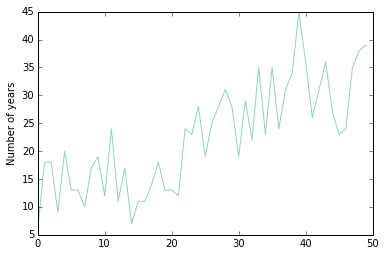

In [20]:
ba = []
for i in range(data.shape[0]):
    ba.append(data[i, 0] - data[i, 1])
plt.plot(range(len(ba)), ba, color = colors[0])
ylabel("Number of years")

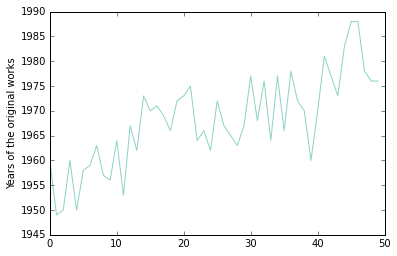

In [23]:
ba = []
for i in range(data.shape[0]):
    ba.append(data[i, 1])
plt.plot(range(len(ba)), ba, color = colors[0])
ylabel("Years of the original works")


In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=10)
    rolstd = pd.rolling_std(timeseries, window=10)
    stdup = []
    stddown = []
    for i in range(len(rolmean)):
        stdup.append(rolmean[i] + rolstd[i])
        stddown.append(rolmean[i] - rolstd[i])
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=colors[0],label='Original')
    mean = plt.plot(rolmean, color=colors[1], label='Rolling Mean')
    
    std = plt.plot(stdup, '--', color=colors[2], label = 'Rolling+Std')
    std = plt.plot(stddown, '--', color=colors[2], label = 'Rolling-Std')
    ylim([min(timeseries), max(timeseries)])
    ylabel("Year of the Original Work")
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

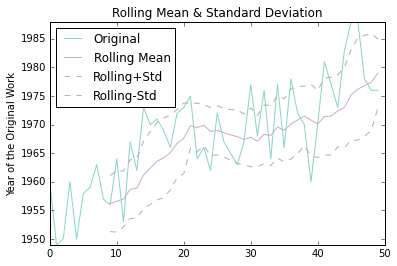

Results of Dickey-Fuller Test:
Test Statistic                 -1.840715
p-value                         0.360443
#Lags Used                      5.000000
Number of Observations Used    44.000000
Critical Value (5%)            -2.929886
Critical Value (1%)            -3.588573
Critical Value (10%)           -2.603185
dtype: float64


In [53]:
test_stationarity(data[:,1])

In [54]:
efile = pd.ExcelFile('/Users/yuyu/Desktop/turingaward.xlsx')
sheet = efile.parse('Sheet1')
labels = sheet.columns.values.tolist()
years = [b[0] for b in sheet.iterrows()]
dele = ['Recipients', 'Citation']

for s in sheet:
    if s in dele:
        del sheet[s]
data = sheet.as_matrix()
print data.shape

(50, 3)


In [68]:
all_area = set()
for i in range(data.shape[0]):
    words = data[i,2].split(',')
    for w in words:
        if w <> '':
            all_area.add(w.strip(' '))
print all_area

set([u'numerical analysis', u'protocol', u'automatic coding', u'computing', u'programming', u'Automata', u'model checking', u'concurrency', u'fault tolerance', u'Programming language', u'error detection', u'computer graphics', u'network', u'personal', u'distributed', u'system', u'verification', u'data structure', u'ecc', u'theory', u'cryptography', u'AI', u'Programming', u'RISC', u'NP-completeness', u'parallel', u'compiler', u'software engineering', u'algorithm', u'database', u'cognition', u'nondeterministic machines', u'complexity', u'architecture', u'consistency', u'security', u'programming language', u'OS', u'interactive'])


In [101]:
all_area = list(all_area)
stat = []
for i in range(len(all_area)):
    stat.append(0)
for i in range(data.shape[0]):
    words = data[i,2].split(',')
    for w in words:
        if w <> "":
            ind = all_area.index(w.strip(' '))
            stat[ind] = stat[ind] + 1
shrink_area = set()
for i in range(len(all_area)):
    if stat[i] > 1:
        shrink_area.add(all_area[i])
    else: 
        print '\'' + all_area[i] + '\','
print shrink_area

'protocol',
'automatic coding',
'Automata',
'model checking',
'fault tolerance',
'error detection',
'computer graphics',
'data structure',
'ecc',
'Programming',
'RISC',
'NP-completeness',
'software engineering',
'cognition',
'nondeterministic machines',
'consistency',
'security',
'programming language',
set([u'OS', u'numerical analysis', u'interactive', u'network', u'cryptography', u'computing', u'personal', u'distributed', u'database', u'programming', u'system', u'complexity', u'AI', u'theory', u'verification', u'concurrency', u'algorithm', u'compiler', u'architecture', u'parallel', u'Programming language'])


In [103]:
result_year0 = []
result_year1 = []
result_area = []
shrink_area = list(shrink_area)
map_area = {
  u'OS':'system',
 u'numerical analysis':'numerical',
 u'interactive':'computing',
 u'network':'system',
 u'cryptography':'crypto',
 u'computing':"computing",
 u'personal':'computing',
 u'distributed':'system',
 u'database':'system',
 u'programming':'PL',
 u'system':'system',
 u'complexity':'theory',
 u'AI':'AI',
 u'theory':'theory',
 u'verification':'crypto',
 u'concurrency':'system',
 u'algorithm':'theory',
 u'compiler':'compiler',
 u'architecture':'system',
 u'parallel':'computing',
 u'Programming language':'PL',
    'protocol': 'system',
'automatic coding': 'other',
'Automata': 'other',
'model checking': 'other',
'fault tolerance': 'other',
'error detection': 'other',
'computer graphics': 'other',
'data structure': 'PL',
'ecc': 'other',
'Programming': 'PL',
'RISC': 'system',
'NP-completeness': 'theory',
'software engineering': 'other',
'cognition': 'AI',
'nondeterministic machines':'other',
'consistency': 'system',
'security':'crypto',
'programming language':'PL',
}
area = ['system', 'compiler', 'computing', 'crypto', 'numerical',  'PL', 'theory', 'AI' ,'other']
for i in range(data.shape[0]):
    words = data[i,2].split(',')
    for w in words:
        if w.strip(' ') in all_area:
            result_year0.append(data[i,0])
            result_year1.append(data[i,1])
            result_area.append(area.index(map_area[w.strip(' ')]))
            
    

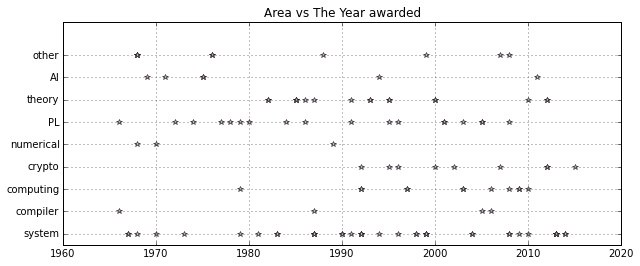

In [104]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(result_year0, result_area, '*',color = colors[1])
ax.set_yticks(range(len(area)))
ax.set_yticklabels(area)
ax.set_ylim([-0.5, len(area) + 0.5])
ax.set_title('Area vs The Year awarded')
ax.grid()

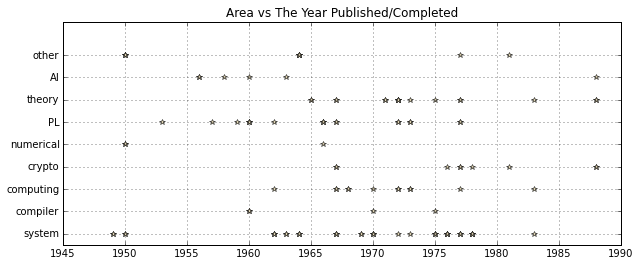

In [105]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(result_year1, result_area, '*',color = colors[3])
ax.set_yticks(range(len(area)))
ax.set_yticklabels(area)
ax.set_ylim([-0.5, len(area) + 0.5])
ax.set_title('Area vs The Year Published/Completed')
ax.grid()